### SHERLOCK EPISODE-1: IDENTITY FEATURE EXTRACTION

In [6]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import dlib
import face_recognition
import pliers

#### IMPORT VIDEO

In [7]:
### get stimuli
sherlock_video = 'stimuli_Sherlock.m4v'

### read video into pliers
from pliers.stimuli import VideoStim
video = VideoStim(sherlock_video)

### downsample video frames (1 frame/second)
from pliers.filters import FrameSamplingFilter
filt = FrameSamplingFilter(hertz=1)
selected_frames = filt.transform(video)
n_frames = selected_frames.n_frames

#### GET TIME SERIES OF FACES

In [9]:
from pliers.extractors import FaceRecognitionFaceLocationsExtractor

In [10]:
# specify convolutional neural network extractor
# from pliers.extractors import FaceRecognitionFaceLocationsExtractor
face_ext = FaceRecognitionFaceLocationsExtractor(model='cnn')

# detect faces in selected frames
face_features = face_ext.transform(selected_frames)

from pliers.extractors import merge_results
merged_faces = merge_results(face_features, metadata=False)

Stim: 1427it [1:09:11,  2.91s/it]


In [11]:
# see which frames have faces in them
face_frames = [f.data for f in selected_frames if f.onset in merged_faces.onset.tolist()]
nonface_frames = [f.data for f in selected_frames if f.onset not in merged_faces.onset.tolist()]

In [12]:
### plot frames

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

def plot_img_grid(img_list, shape, figsize=(30., 30.)):
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111, nrows_ncols=shape, axes_pad=0.1)

    for ax, im in zip(grid, img_list):
        ax.imshow(im)

    plt.show()

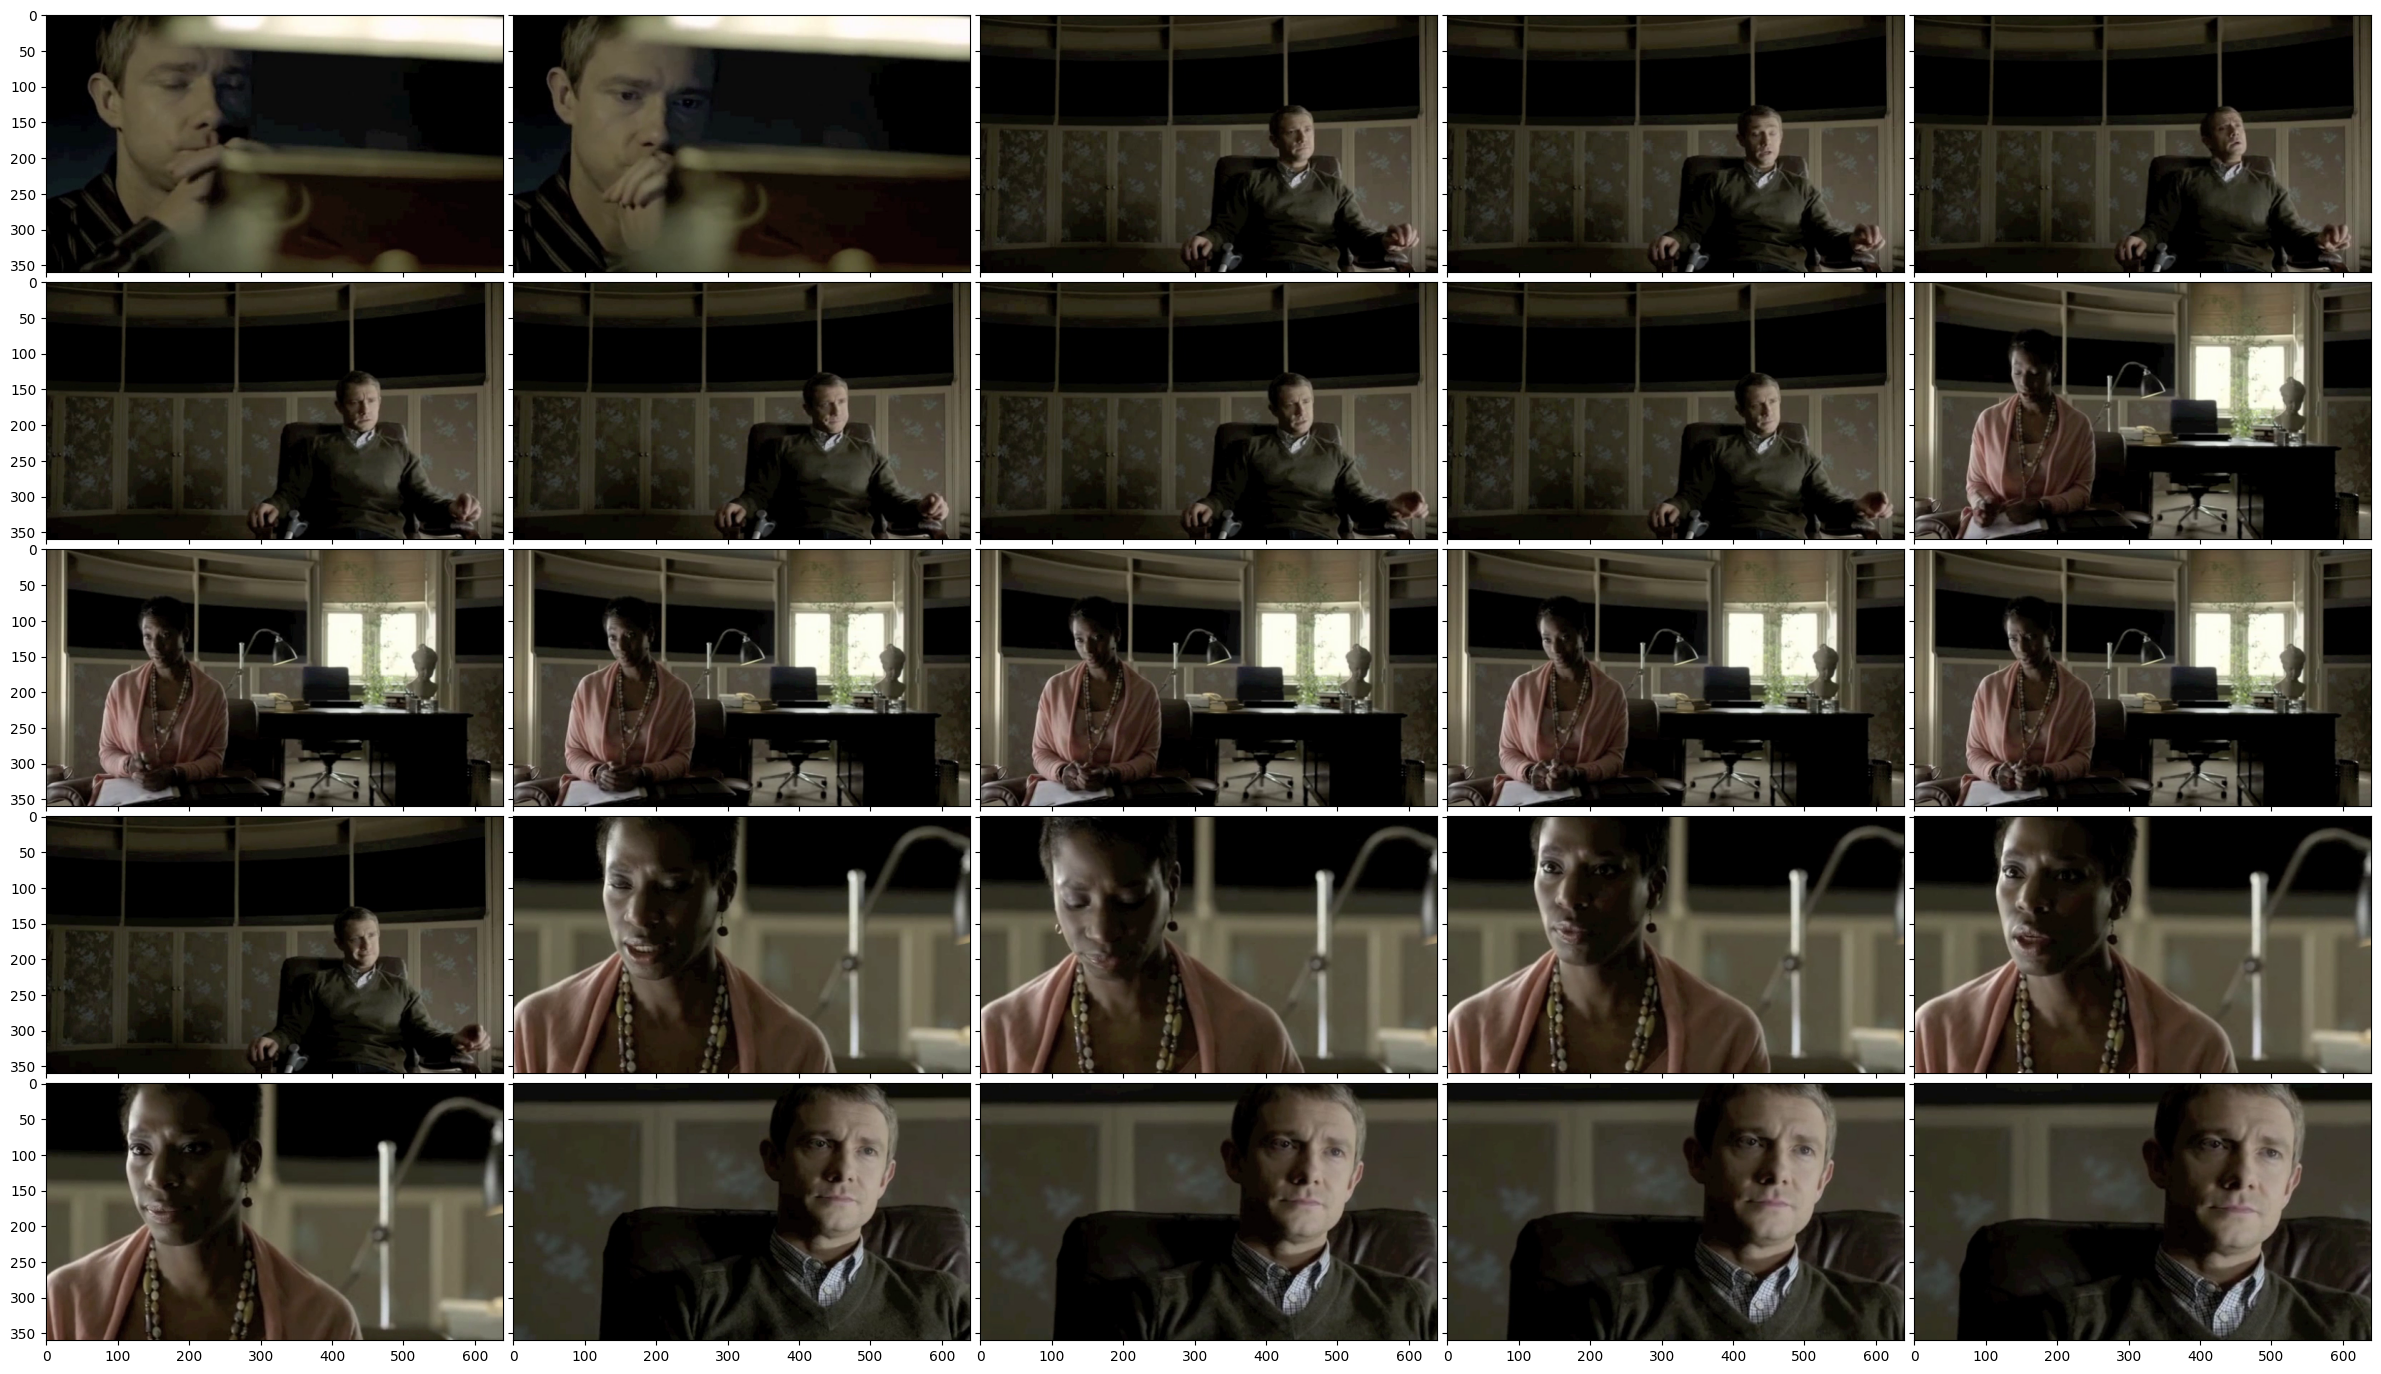

In [19]:
plot_img_grid(face_frames[25:50], (5,5))

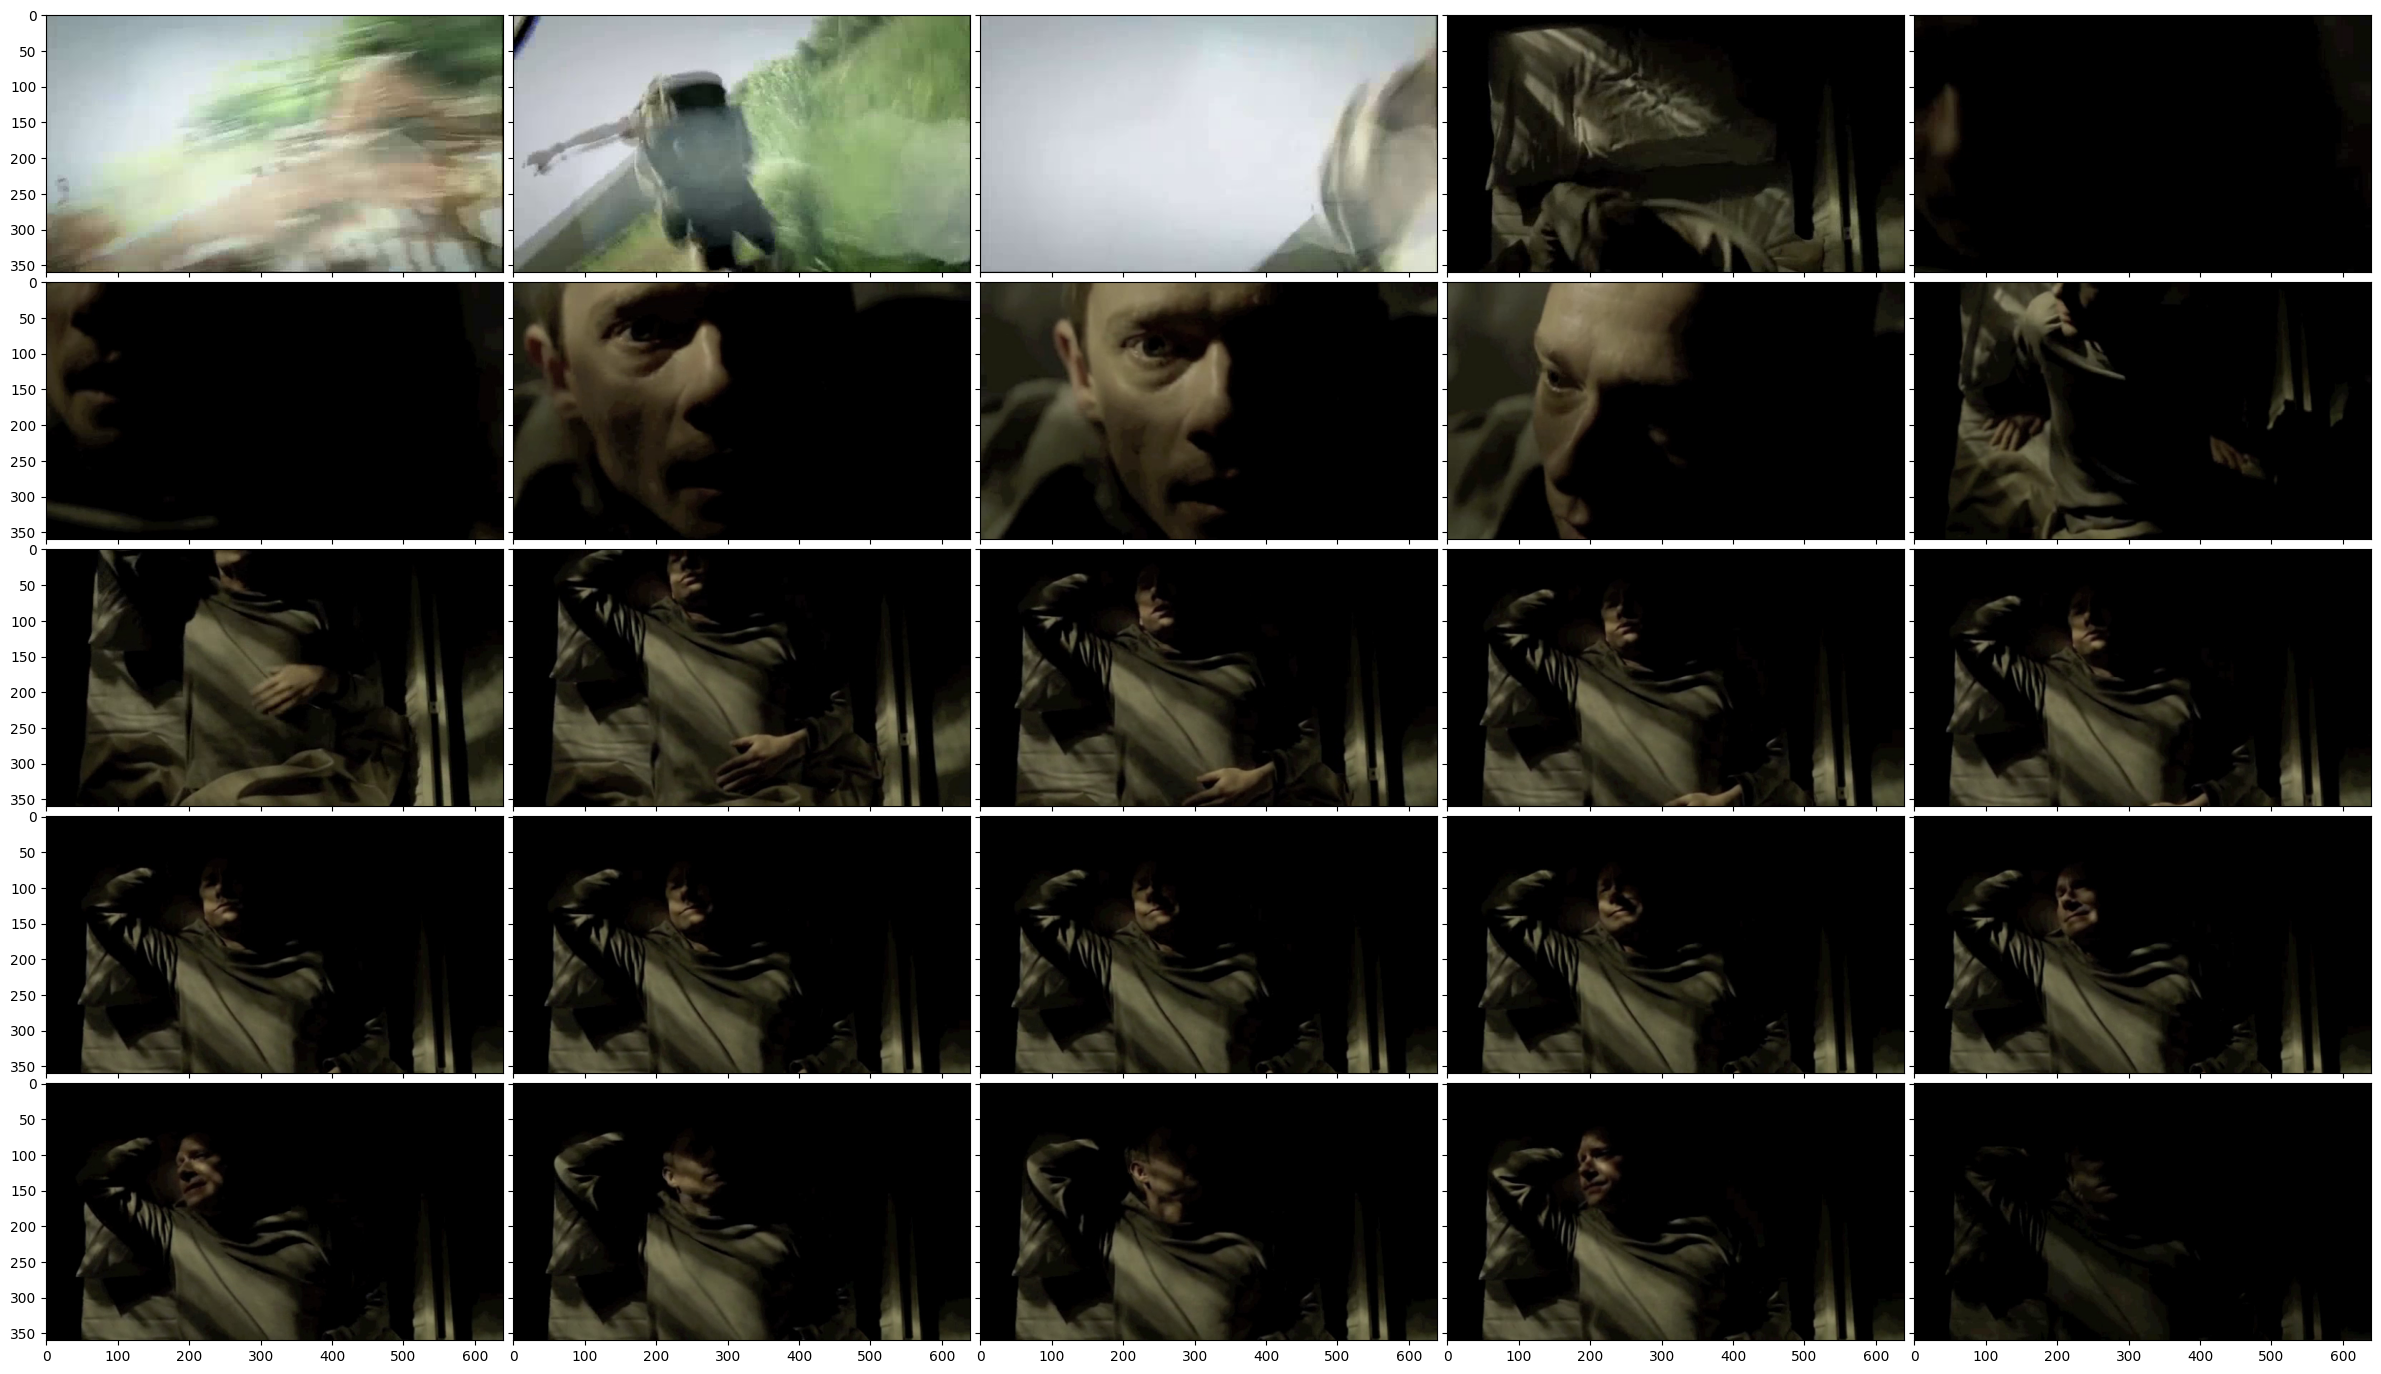

In [20]:
plot_img_grid(nonface_frames[50:75], (5,5))

#### CREATE AND SAVE PNGS OF EACH FACE FRAME

In [ ]:
### get face time stamps

### save face images into folder

### use face location data to cut image of face and save???

### deepface to identify individuals
from deepface import DeepFace
result = DeepFace.verify(img1_path = "img1.jpg", img2_path = "img2.jpg")

#### USE DEEP FACE TO COMPARE INDIVIDUALS